# PyTorch Basics

## Init, helpers, utils, ...

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from IPython.core.debugger import set_trace

%matplotlib inline

In [3]:
from ppt.utils import attr

# Tensors
tensors - the atoms of machine learning

## Tensors in numpy and pytorch

In [4]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [5]:
import torch

In [6]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
# torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [8]:
# numpy
X = np.random.random((5, 3))
X

array([[0.93873639, 0.35906478, 0.39836019],
       [0.21408137, 0.80254145, 0.27043274],
       [0.27750988, 0.65646783, 0.77699922],
       [0.27066044, 0.66296779, 0.21450796],
       [0.60612995, 0.85470609, 0.64849975]])

In [9]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[0.3188, 0.1482, 0.7489],
        [0.3219, 0.5307, 0.2001],
        [0.9031, 0.8144, 0.7654],
        [0.7076, 0.2671, 0.6619],
        [0.4211, 0.0924, 0.1672]])

In [10]:
X.shape

(5, 3)

In [11]:
Y.shape

torch.Size([5, 3])

In [12]:
# numpy
X.T @ X

array([[1.44471917, 1.38855478, 1.09860872],
       [1.38855478, 2.3739991 , 1.56663415],
       [1.09860872, 1.56663415, 1.30211809]])

In [13]:
# torch
Y.t() @ Y

tensor([[1.6990, 1.1815, 1.5331],
        [1.1815, 1.0468, 1.0327],
        [1.5331, 1.0327, 1.6526]])

In [14]:
# numpy
inv(X.T @ X)

array([[ 1.96580359, -0.26836186, -1.33568847],
       [-0.26836186,  2.08114718, -2.27749816],
       [-1.33568847, -2.27749816,  4.63506761]])

In [15]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 6.5681, -3.6568, -3.8080],
        [-3.6568,  4.5269,  0.5635],
        [-3.8080,  0.5635,  3.7856]])

## More on PyTorch Tensors

Operations are also available as methods.

In [16]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [17]:
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.

In [18]:
A.add_(1)
A

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

## Indexing and broadcasting
It works as expected:

In [19]:
A[0, 0]

tensor(2.)

In [20]:
A[0]

tensor([2., 1., 1.])

In [21]:
A[0:2]

tensor([[2., 1., 1.],
        [1., 2., 1.]])

In [22]:
A[:, 1:3]

tensor([[1., 1.],
        [2., 1.],
        [1., 2.]])

## Converting

In [23]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [24]:
# torch --> numpy
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [25]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

# Autograd
Prior to `v0.4` PyTorch used the class `Variable` to record gradients. You had to wrap `Tensor`s in `Variable`s.
`Variable`s behaved like `Tensors`.

With `v0.4` `Tensor` can record gradients directly if you tell it do do so, e.g. `torch.ones(3, requires_grad=True)`.
There is no need for `Variable` anymore.

Ref:
- https://pytorch.org/docs/stable/autograd.html
- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [26]:
from torch import autograd  # you rarely use it directly

In [27]:
w = torch.ones(1)
w.requires_grad

False

In [28]:
z = torch.ones(1) * 2
z.requires_grad

False

In [29]:
total = w + z
total

tensor([3.])

In [30]:
# What is going to happen here?
total.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [31]:
w = torch.ones(1, requires_grad=True)
w.requires_grad

True

In [32]:
total = w + z
total.requires_grad

True

In [33]:
total.backward()

In [34]:
w.grad

tensor([1.])

In [35]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

# But what about the GPU?
How do I use the GPU?

If you have a GPU make sure that the right pytorch is installed

```
conda install pytorch torchvision cuda91 -c pytorch
```
Check https://pytorch.org/ for details.

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

If you have a GPU you should get something like: 
`device(type='cuda', index=0)`

You can move data to the GPU by doing `.to(device)`.

In [37]:
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], device='cuda:0')

Note: before `v0.4` one had to use `.cuda()` and `.cpu()` to move stuff to and from the GPU.
This littered the code with many:
```python
if CUDA:
    model = model.cuda()
```

# LinReg with PyTorch, Gradient Descent, and GPU

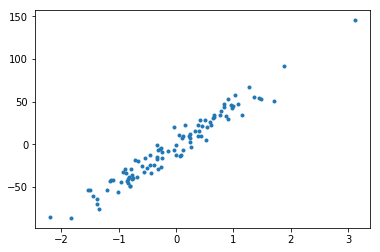

In [38]:
from sklearn.datasets import make_regression

n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [39]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [40]:
from torch import nn
from torch import optim


class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [41]:
# Move everything to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)  # <-- here
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

X, y = X.to(device), y.to(device)  # <-- here

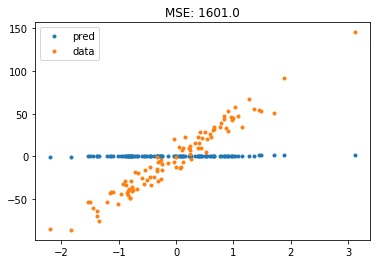

In [42]:
# Train step
model.train()
optimizer.zero_grad()

y_ = model(X)
loss = criterion(y_, y)

loss.backward()
optimizer.step()

# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

# Debugging

**Q: "No debugger for your code. What do you think?"**

**A: "I would NOT be able to code!"**

- Who does "print-line-debugging"?
- Who likes debugging in tensorflow?
- What is the intersection of those two groups?


## IPDB cheatsheet
IPython Debugger

Taken from http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/

- h(help): Print help

- n(ext): Continue execution until the next line in the current function is reached or it returns.
- s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).
- r(eturn): Continue execution until the current function returns.

- r(eturn): Continue execution until the current function returns.
- a(rgs): Print the argument list of the current function.

In [43]:
from IPython.core.debugger import set_trace

In [44]:
def my_function(x):
    answer = 42
    set_trace()
    answer += x
    return answer

my_function(12)

> <ipython-input-44-5e18392d88af>(4)my_function()
      2     answer = 42
      3     set_trace()
----> 4     answer += x
      5     return answer
      6 



54

## Example: debuging a NN

In [45]:
X = torch.rand((5, 3))
X

tensor([[0.2726, 0.8991, 0.9666],
        [0.6416, 0.2042, 0.3535],
        [0.5593, 0.9923, 0.2504],
        [0.8859, 0.1239, 0.2995],
        [0.0147, 0.5534, 0.0521]])

In [47]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        set_trace()
        x = self.lin(X)
        return x

    
model = MyModule()
y_ = model(X)

assert y_.shape == (5, 1), y_.shape

> <ipython-input-47-46b07a4f4a49>(8)forward()
      6     def forward(self, X):
      7         set_trace()
----> 8         x = self.lin(X)
      9         return x
     10 



# Recap - what we learned so far
- Tensor like numpy
- No need to calculate derivatives - automatic differentiation!
- Use `nn.Module` to create your own networks
- `set_trace` is your friend!